Задача 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston['data']

col_name = boston['feature_names']
X = pd.DataFrame(data, columns=col_name)

target = boston['target']
Y = pd.DataFrame(target, columns=['price'])

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

Масштабируйте данные с помощью StandardScaler.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Для масштабирования: получаю стандартизированные значения после обучения объекта scaler методом fit_transform на данных Х

In [7]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

X_train_s = pd.DataFrame(X_train_s, columns = col_name)
X_test_s = pd.DataFrame(X_test_s, columns = col_name)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)
X_train_t = tsne.fit_transform(X_train_s)

Постройте диаграмму рассеяния на этих данных.

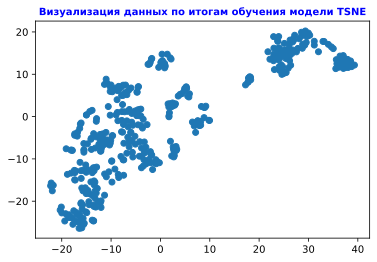

In [9]:
plt.scatter(X_train_t[:, 0], X_train_t[:, 1])
plt.title("Визуализация данных по итогам обучения модели TSNE", fontsize = 10, fontweight='bold', color = 'blue')
plt.show()

Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)
train_label = km.fit_predict(X_train_s)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

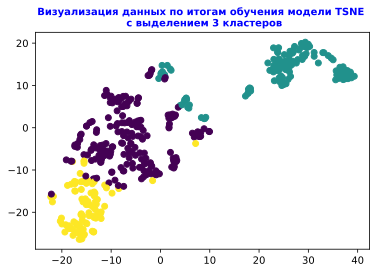

In [15]:
plt.scatter(X_train_t[:, 0], X_train_t[:, 1], c = train_label)
plt.title("Визуализация данных по итогам обучения модели TSNE \n с выделением 3 кластеров", 
          fontsize = 10, fontweight='bold', color = 'blue')
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [16]:
print('Cредняя цена в Кластере 0: {}'.format(Y_train.loc[train_label == 0, 'price'].mean()))
print('Cредняя цена в Кластере 1: {}'.format(Y_train.loc[train_label == 1, 'price'].mean()))
print('Cредняя цена в Кластере 2: {}'.format(Y_train.loc[train_label == 2, 'price'].mean()))

Cредняя цена в Кластере 0: 24.958115183246072
Cредняя цена в Кластере 1: 16.165354330708666
Cредняя цена в Кластере 2: 27.788372093023252


In [17]:
print('Cреднее значение CRIM в Кластере 0: {}'.format(X_train.loc[train_label == 0, 'CRIM'].mean()))
print('Cреднее значение CRIM в Кластере 1: {}'.format(X_train.loc[train_label == 1, 'CRIM'].mean()))
print('Cреднее значение CRIM в Кластере 2: {}'.format(X_train.loc[train_label == 2, 'CRIM'].mean()))

Cреднее значение CRIM в Кластере 0: 0.42166020942408367
Cреднее значение CRIM в Кластере 1: 10.797028425196853
Cреднее значение CRIM в Кластере 2: 0.07356558139534886


Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [18]:
train_label_test = km.fit_predict(X_test_s)

In [19]:
print('Cредняя цена в Кластере 0: {}'.format(Y_test.loc[train_label_test == 0, 'price'].mean()))
print('Cредняя цена в Кластере 1: {}'.format(Y_test.loc[train_label_test == 1, 'price'].mean()))
print('Cредняя цена в Кластере 2: {}'.format(Y_test.loc[train_label_test == 2, 'price'].mean()))

Cредняя цена в Кластере 0: 16.710526315789473
Cредняя цена в Кластере 1: 21.652
Cредняя цена в Кластере 2: 33.871428571428574


In [20]:
print('Cреднее значение CRIM в Кластере 0: {}'.format(X_test.loc[train_label_test == 0, 'CRIM'].mean()))
print('Cреднее значение CRIM в Кластере 1: {}'.format(X_test.loc[train_label_test == 1, 'CRIM'].mean()))
print('Cреднее значение CRIM в Кластере 2: {}'.format(X_test.loc[train_label_test == 2, 'CRIM'].mean()))

Cреднее значение CRIM в Кластере 0: 9.419181842105264
Cреднее значение CRIM в Кластере 1: 0.2244212
Cреднее значение CRIM в Кластере 2: 0.08618571428571427
